erro quadrado 225 está errado 15 minutos

erro mais de 2000 vai ser complicado

plotar histograma predito menos real

transformar em categoricas 

usar o do pandas 

holiday já tem

In [51]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('../data/flights4.csv')

In [53]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,5,RG,Airbus A320,non-schengen,BYU,15.135172,19.135172,0,2010,False,44.552479
1,19,SR,Boeing 737,schengen,LZW,10.698807,13.698807,0,2010,False,30.931739
2,19,SR,Boeing 737,schengen,LZW,10.698807,13.698807,0,2010,False,12.522989
3,26,RG,Boeing 787,non-schengen,NNN,16.970906,19.970906,0,2010,False,38.306160
4,3,SR,Boeing 737,schengen,YOG,8.431066,11.431066,0,2010,False,18.484254


<Axes: >

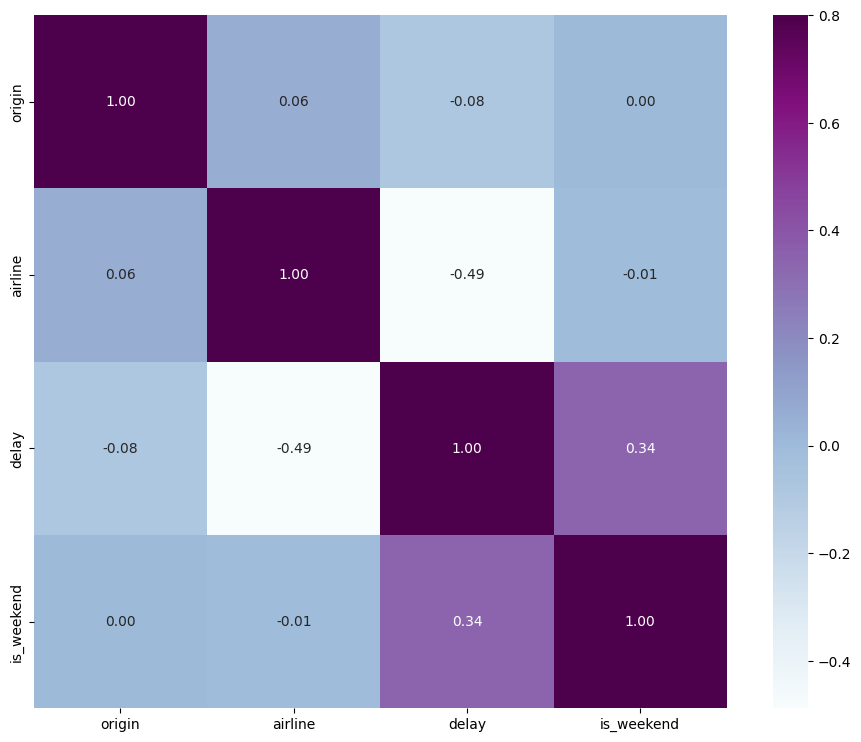

In [70]:
import seaborn as sns

#encoding all columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['origin'] = le.fit_transform(df['origin'])
df['airline'] = le.fit_transform(df['airline'])
df['aircraft_type'] = le.fit_transform(df['aircraft_type'])
df['schengen'] = le.fit_transform(df['schengen'])

#create feature is weekend day
df['is_weekend'] = df['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

#correlation matrix
corrmat = df[['origin', 'airline', 'delay', 'is_weekend']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap="BuPu")

         feature  importance
1        airline    0.551468
3     is_weekend    0.253352
2  aircraft_type    0.114247
0         origin    0.080933


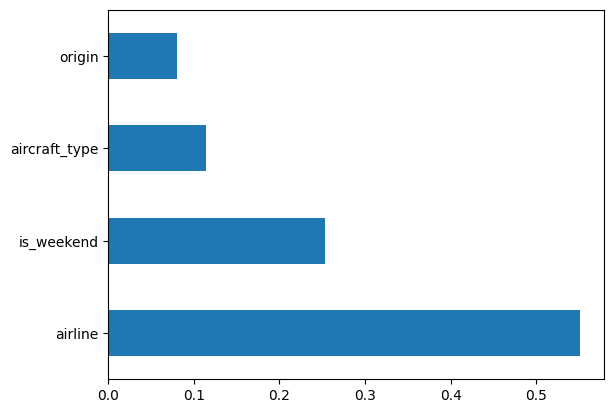

In [76]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(df[['origin', 'airline', 'aircraft_type', 'is_weekend']], df['delay'])

#table of feature importance and columns names sorted by importance
_ = pd.DataFrame({'feature': df[['origin', 'airline', 'aircraft_type', 'is_weekend']].columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)
print(_) #display last output
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df[['origin', 'airline', 'aircraft_type', 'is_weekend']].columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [56]:
df.describe()

,flight_id,airline,aircraft_type,origin,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.556431,1.201096,1.867496,3.899768,13.417335,16.515164,182.000000,2016.000000,16.289442
std,8.653982,0.599040,1.357818,2.727421,4.230404,4.460761,105.366769,3.741684,26.895063
min,1.000000,0.000000,0.000000,0.000000,6.979612,9.979612,0.000000,2010.000000,-71.929679
25%,8.000000,1.000000,0.000000,2.000000,8.481436,12.177842,91.000000,2013.000000,-2.538180
50%,16.000000,1.000000,2.000000,4.000000,15.475332,18.475332,182.000000,2016.000000,14.763830
75%,23.000000,2.000000,3.000000,6.000000,17.011918,20.694357,273.000000,2019.000000,33.535219
max,30.000000,2.000000,4.000000,9.000000,20.221666,22.297040,364.000000,2022.000000,166.064113


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  int32  
 2   aircraft_type   71175 non-null  int32  
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  int32  
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
 11  is_weekend      71175 non-null  bool   
dtypes: bool(2), float64(3), int32(3), int64(3), object(1)
memory usage: 4.8+ MB


In [58]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 71175
Number of columns: 12


In [59]:
# Function to convert decimal time to hours and minutes
def convert_decimal_to_time(decimal_time):
    hours = int(decimal_time)
    minutes = int((decimal_time - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Convert arrival time column
df['arrival_time'] = df['arrival_time'].apply(convert_decimal_to_time)

# Convert departure time column
df['departure_time'] = df['departure_time'].apply(convert_decimal_to_time)

# Display the updated DataFrame
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,is_weekend
0,5,1,0,non-schengen,0,15:08,19:08,0,2010,False,44.552479,True
1,19,2,2,schengen,4,10:41,13:41,0,2010,False,30.931739,True
2,19,2,2,schengen,4,10:41,13:41,0,2010,False,12.522989,True
3,26,1,4,non-schengen,6,16:58,19:58,0,2010,False,38.306160,True
4,3,2,2,schengen,9,08:25,11:25,0,2010,False,18.484254,True


In [60]:
# Function to convert day and year to a regular date
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
df['date'] = df.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

# Display the updated DataFrame
df.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,is_weekend,date
0,5,1,0,non-schengen,0,15:08,19:08,0,2010,False,44.552479,True,2010-01-01
1,19,2,2,schengen,4,10:41,13:41,0,2010,False,30.931739,True,2010-01-01
2,19,2,2,schengen,4,10:41,13:41,0,2010,False,12.522989,True,2010-01-01
3,26,1,4,non-schengen,6,16:58,19:58,0,2010,False,38.306160,True,2010-01-01
4,3,2,2,schengen,9,08:25,11:25,0,2010,False,18.484254,True,2010-01-01


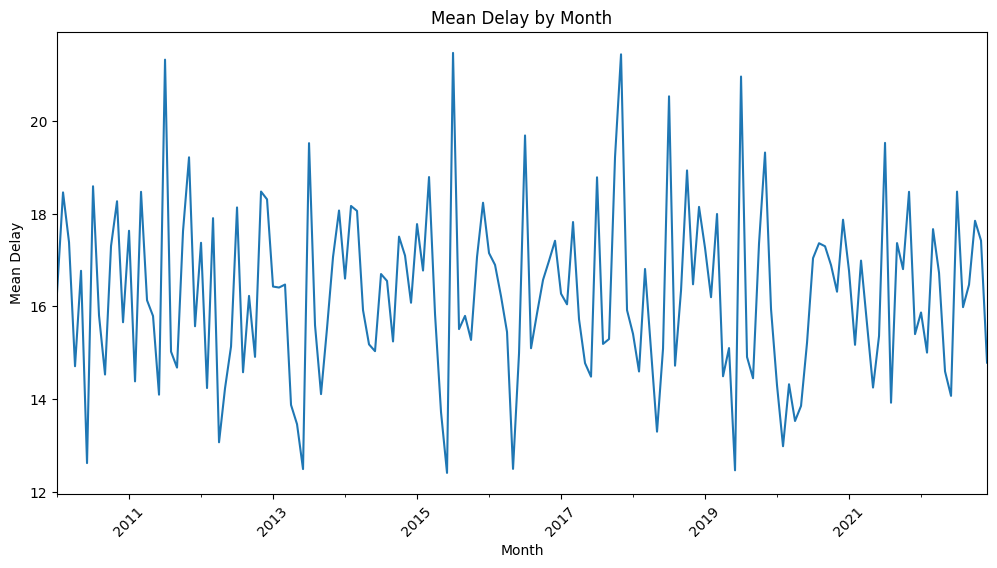

In [61]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and calculate the mean delay
mean_delay_by_month = df.groupby(df['date'].dt.to_period('M'))['delay'].mean()

# Create the graph
plt.figure(figsize=(12, 6))
mean_delay_by_month.plot(kind='line')
plt.title('Mean Delay by Month')
plt.xlabel('Month')
plt.ylabel('Mean Delay')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

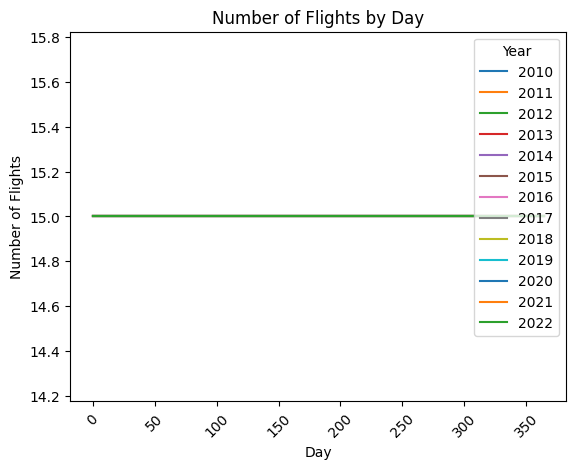

In [62]:
# Group the data by year and day, and calculate the count of flights
flight_count_by_year_day = df.groupby(['year', 'day'])['flight_id'].count().unstack('year')

# Create the graph
plt.figure(figsize=(12, 6))
flight_count_by_year_day.plot(kind='line')
plt.title('Number of Flights by Day')
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

In [63]:
import seaborn as sns

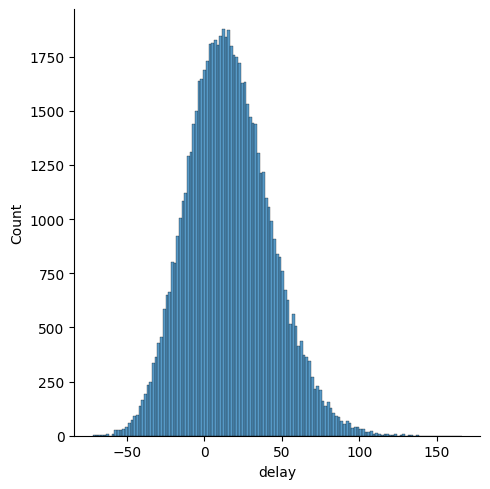

In [64]:
#plot a histogram of the delay column
sns.displot(df['delay'])

<Axes: xlabel='airline', ylabel='count'>

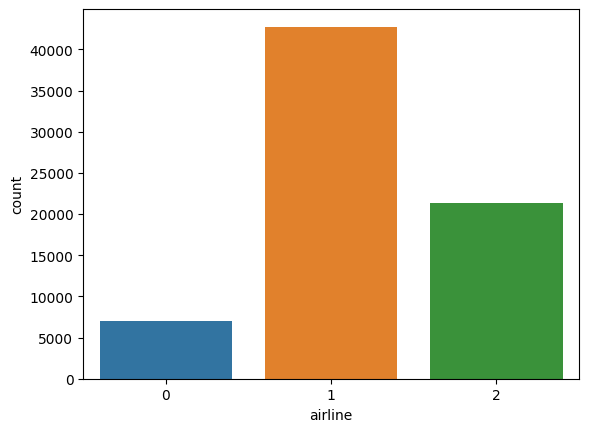

In [65]:
#plot amouth of flights by airline
sns.countplot(x='airline', data=df)

<Axes: xlabel='origin', ylabel='count'>

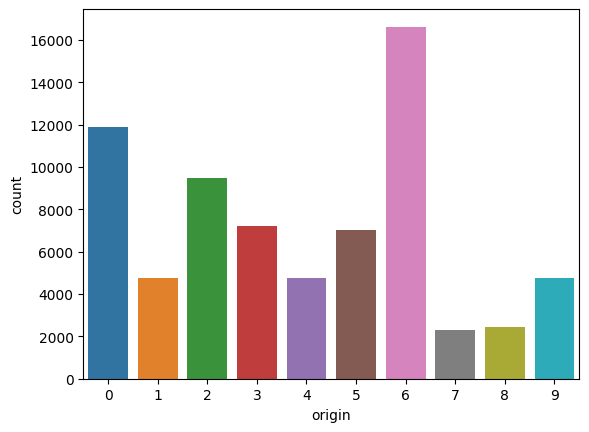

In [66]:
#plot amouth of flights by origin
sns.countplot(x='origin', data=df)

In [67]:
df['schengen'].value_counts(normalize=True)

schengen
schengen        0.734766
non-schengen    0.265234
Name: proportion, dtype: float64

<Axes: xlabel='schengen', ylabel='count'>

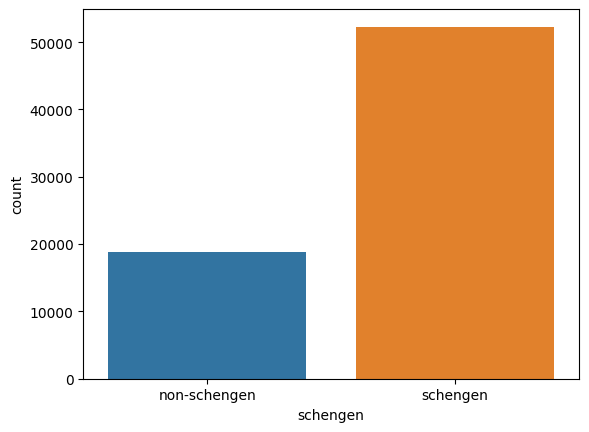

In [68]:
#plot amout of flights schengen and non-schengen
sns.countplot(x='schengen', data=df)

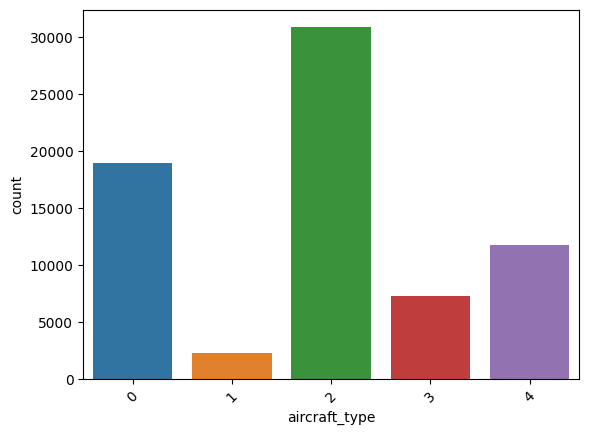

In [69]:
#plot amount of flights by aircraft type
sns.countplot(x='aircraft_type', data=df)
#rotate x axis labels
plt.xticks(rotation=45)
plt.show()

In [77]:
df.delay.mean()

16.289441971446266

In [78]:
df.delay.median()

14.763829821589386